<a href="https://colab.research.google.com/github/AMRowe99/ES_Class/blob/main/Logistic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

# Population Dynamics and Logistic Growth
Dynamics of stock changes can be modeled using simple conservation accounting and specific relationships for fluxes, sources, and sinks. For example, the rate of change of population in a region can be written,

Rate Balance: $\frac{{dP}}{{dt}} = {\dot P_{in}} - {\dot P_{out}} + {\dot \sigma _{birth}} - {\dot \sigma _{deaths}}$

or

Simplified Balance: $ \frac{{dP}}{{dt}} = {\dot P_{in}} + {\dot \sigma _{birth}} $

where flows are positive into the region (immigration) and deaths would be negative births.

We can apply a rate law to create an equation in $P(t)$. For example, if we know the birth rate is $\beta$ % (number born per year /total number of people) and the death rate is δ (number of people who die per year / total number of people), and we are modeling the earth (so there is no immigration, flux across the boundary),

$ \frac{{dP}}{{dt}} = {\dot \sigma _{birth}} = \beta P - \delta P = {\beta _n}P$

where $\beta$ is the net birth rate ($\beta - \delta$). Solving this equation for $P(t)$ gives an **exponential** growth rate,

$ P(t) = {P_0}\exp ({\beta _n}t) $

# Logistic Growth
Exponential growth is typically not representative of real physical quantities (over shorter times, it may be a good representation) as there is a finite size, or magnitude, that can be achieved.

We may say that the maximum population is limited to $P_{max}$ and assume that the net birth rate reduces as the maximum population is approached according to,

$ \beta_{n} (P) = \beta \left( 1 - \frac{P} {P_{max}} \right) $

If we apply this rate expression to our population balance (for no immigration), we get an equation known as the **logistic equation**,

$ \frac{dP}{dt} = \beta P \left( 1 - \frac{P}{P_{max}} \right)$

## Non-dimensionalize
We can re-write the above in terms of non-dimensionalized time and population,

$ t^{*} = \beta t$ and $ p = \frac{P}{P_{max}}$

so, $ \frac{dp}{dt^{*}} = p \left( 1 - p \right)$

These are convenient variables; $p$ varies between 0 and 1 and is the population relative to the maximum possible, $t^{*}$ is relative to the system time constant as defined by $1/\beta$.

## Logistic Function
We can determine the functional from of the logistic equation by integrating the expression for rate of change.

Separating variables,
$ \int \frac{dp}{p \left( 1 - p \right) } = \int dt^{*}$, and integrating the left hand side,

In [ ]:
# @title
tstar= smp.symbols('t^{*}', real=True, positive=True)
p= smp.symbols('p', cls=smp.Function)
p=p(tstar)

# b, Pmax, t0, tf = smp.symbols(['beta', 'P_{max}', 't_{0}', 't_{f}'], real=True, positive=True)

fa = (p*(1-p))**(-1)
smp.integrate(fa, p) #smp.integrate(fa, (tstar,t0,tf)).doit()

-log(p(t^{*}) - 1) + log(p(t^{*}))

We can rewrite the above and evalute for $t^{*}_{0}$ and $t^{*}$,

$\frac{p(t^{*})}{p^{*}(t^{*})-1}-\frac{p_{0}}{p_{0}-1}= \exp(t^{*}-t^{*}_{0})$

With a bit more algebra and replacing non-dimensional time we have,

**Logistic Equation:** $p(t)=\frac{1}{1+\frac{1-p_{0}}{p_{0}} \exp(-\beta(t-t_{0}))}$

# Example

The global population in 2010 is 6 Billion and the birth rate is 1.5 %/yr. A logistics model for population growth assumes the maximum population is 9 Billion. What is the projected population in 2050?


In this case we can set our reference time as 2010, $t_{0}=2010$ and the population as $P_{0}=6$ Billion.
At this point, we are told the growth rate, $r=\frac{1}{P}\frac{dP}{dt}$=0.015 per year (1.5%/yr).

The parameter $\beta$ is then determined by,
$\frac{1}{P}\frac{dP}{dt}=\beta(1-\frac{P_{0}}{P_{max}})=r$,

thus, $\beta=\frac{r}{1-P_{0}/P_{max}}=\frac{r}{1-p_{0}}$.

In [ ]:
# @title
r0=0.015
t0=2010
P0=6
Pmax=9

p0=P0/Pmax

beta=r0/(1-p0)

Population=lambda year: Pmax*(1+(1-p0)/p0*np.exp(-beta*(year-t0)))**(-1)
y=2050
print(f"The population in year {y} is = {Population(y):1.1f} Billion")

The population in year 2050 is = 8.3 Billion


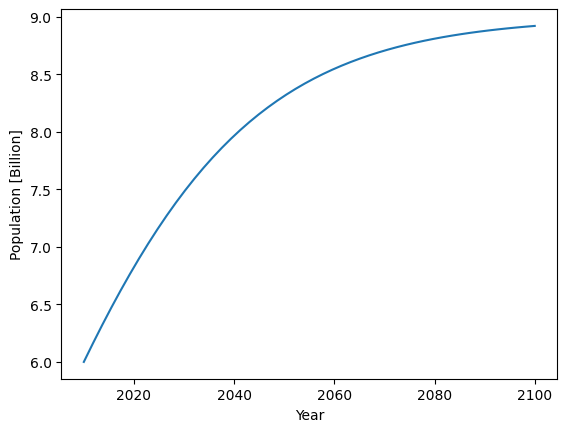

In [ ]:
# @title
years=np.linspace(2010,2100)
P_t=Population(years)
plt.plot(years, P_t)
plt.xlabel('Year')
plt.ylabel('Population [Billion]')
plt.show()